In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import seaborn as sns
import matplotlib.cm as cm

In [12]:
# Load the CSV file
file_path = r'Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\no_drug\Analysed Data\2x\Trackmate analysis new 07052024\csv files\flagged tracks\20240118_UGD-2x-2s-replicate1-FOV-2_with_cellIDs_with_step_sizes-wstepflags.csv' 
data = pd.read_csv(file_path)

In [13]:
# Ensure step_flag is boolean and filter for True values
data['step_flag'] = data['step_flag'].astype(str).str.upper() == 'TRUE'

In [14]:
# Identify trackIDs with consecutive TRUE values in step_flag
def has_consecutive_true(df, col='step_flag'):
    return df[col].rolling(window=2).apply(lambda x: all(x), raw=True).any()

valid_track_ids = data.groupby('trackID').filter(has_consecutive_true)['trackID'].unique()

if len(valid_track_ids) == 0:
    raise ValueError("No trackIDs found with consecutive TRUE values in step_flag.")

In [15]:
# Randomly select one valid trackID
random_track_id = np.random.choice(valid_track_ids, 1)[0]
# Extract data for the selected trackID
track_data = data[data['trackID'] == random_track_id].copy()

In [16]:
um_per_pixel = 0.117
track_data['x'] = track_data['x'] * um_per_pixel
track_data['y'] = track_data['y'] * um_per_pixel

In [17]:
s_per_frame = 2
track_data['t'] = track_data['t'] * s_per_frame

In [18]:
# Store results for future access and extract values
stored_track_data = track_data.copy()
stored_random_track_id = random_track_id
x = track_data['x'].values
y = track_data['y'].values
t = track_data['t'].values

# Debugging: Print x, y, t values
print("Debug information:")
print(f"Track ID: {random_track_id}")
print(f"x: {x}")
print(f"y: {y}")
print(f"t: {t}")

Debug information:
Track ID: 422
x: [45.74355849 45.75863969 45.76384623 45.81588059 45.74399696 45.70929097
 45.70897793 45.72926761 45.72664513 45.73433422 45.69270448 45.66649827
 45.72934512 45.68759227 45.73031113 45.66322995 45.67240723 45.66152646
 45.69838626 45.65087281 45.67348807 45.66514291 45.65202397 45.61817114
 45.61764544 45.60439282 45.57616877 45.53963411 45.5881424  45.61943931
 45.60830007 45.52491232 45.47499122 45.4391534  45.36785365 45.32110257
 45.33698648 45.25109127 45.24103776 45.20711537 45.27164877 45.26001592
 45.23727664 45.25499954 45.21005747 45.16889573 45.15275859 45.14902704
 45.16329122 45.17173532 45.21533979 45.12690444 45.11755281 45.08126988
 45.12272722 45.12650475 45.14420747 45.15698763 45.17106524 45.07118157
 45.09701609 45.06442999 45.05777379 45.06865545 45.04201254 45.0359574
 44.9429969  45.00870772 44.95353829 44.98441247 45.42374949 46.00919935
 46.09738274 46.04483225 46.02989566 45.96607491 46.03875022 46.04690092
 46.08851349 46.

x_plot: [ 0.19897729  0.21405849  0.21926503  0.27129939  0.19941576  0.16470976
  0.16439673  0.1846864   0.18206392  0.18975302  0.14812328  0.12191706
  0.18476392  0.14301107  0.18572992  0.11864875  0.12782603  0.11694525
  0.15380506  0.10629161  0.12890687  0.1205617   0.10744277  0.07358994
  0.07306424  0.05981161  0.03158756 -0.0049471   0.0435612   0.07485811
  0.06371886 -0.01966889 -0.06958998 -0.10542781 -0.17672755 -0.22347864
 -0.20759473 -0.29348994 -0.30354344 -0.33746583 -0.27293244 -0.28456528
 -0.30730457 -0.28958166 -0.33452374 -0.37568548 -0.39182261 -0.39555416
 -0.38128999 -0.37284588 -0.32924142 -0.41767677 -0.4270284  -0.46331133
 -0.42185398 -0.41807646 -0.40037373 -0.38759358 -0.37351597 -0.47339963
 -0.44756512 -0.48015122 -0.48680742 -0.47592576 -0.50256866 -0.5086238
 -0.60158431 -0.53587349 -0.59104292 -0.56016873 -0.12083171  0.46461814
  0.55280154  0.50025105  0.48531445  0.42149371  0.49416902  0.50231971
  0.54393228  0.55328689  0.5431618   0.5280

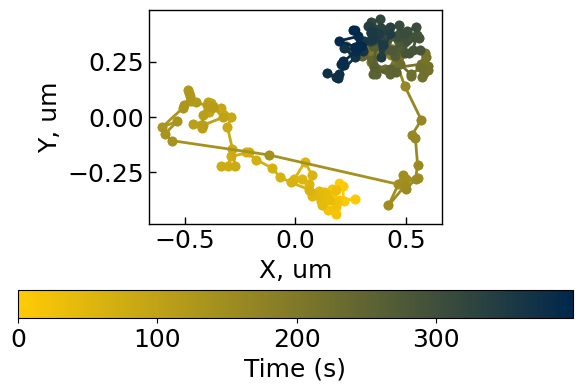

In [19]:
cmap_color_start = "#FFCB05"
cmap_color_end = "#00274C"
cmap_name = "maize2blue"
cmap = clr.LinearSegmentedColormap.from_list(cmap_name, [cmap_color_start, cmap_color_end], N=len(t))
fontsize = 18
x_plot = x - (x.min() + x.max()) / 2
y_plot = y - (y.min() + y.max()) / 2

print(f"x_plot: {x_plot}")
print(f"y_plot: {y_plot}")

fig, ax = plt.subplots(figsize=(6, 4))

# Plot the trajectory with color mapping
for i in range(len(t) - 1):
    ax.plot(
        x_plot[i:i + 2], y_plot[i:i + 2], "-o",
        color=cmap(i / len(t)),
        linewidth=2
    )

# Customize plot aesthetics
ax.axis("scaled")
ax.spines[:].set_linewidth(1)
ax.tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1
)
ax.set_xlabel('X, um', fontsize=18)
ax.set_ylabel('Y, um', fontsize=18)

ax.relim()
ax.autoscale_view()

normalize = clr.Normalize(vmin=t.min(), vmax=t.max())
cbar = plt.colorbar(
    cm.ScalarMappable(norm=normalize, cmap=cmap),
    ax=ax,
    orientation='horizontal',
    pad=0.2,
    drawedges=False
)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_label('Time (s)', fontsize=18)
# Final layout adjustments and show the plot
plt.tight_layout()
plt.show()

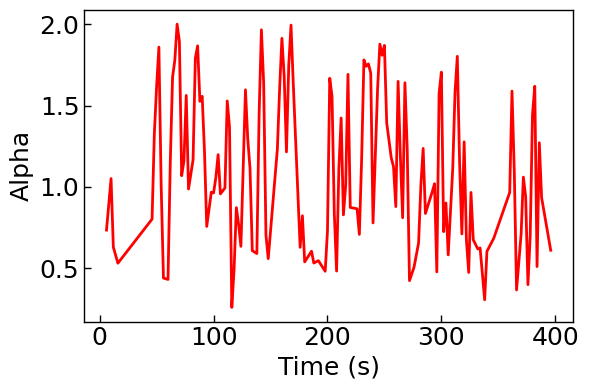

In [20]:
track_data = track_data.dropna(subset=['alpha', 'R2'])
track_data = track_data[(track_data['R2'] > 0.6) & (track_data['alpha'] > 0)]

# Extract values for alpha and t
alpha = track_data['alpha'].values
t_valid = track_data['t'].values  # 't' is already converted to seconds

# Plot alpha vs. time
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(t_valid, alpha, linestyle='-', color='red', lw=2)  # Continuous red line

# Customize plot aesthetics
ax.spines[:].set_linewidth(1)
ax.tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1
)
ax.set_xlabel('Time (s)', fontsize=18)
ax.set_ylabel('Alpha', fontsize=18)

# Final layout adjustments and show plot
plt.tight_layout()
plt.show()

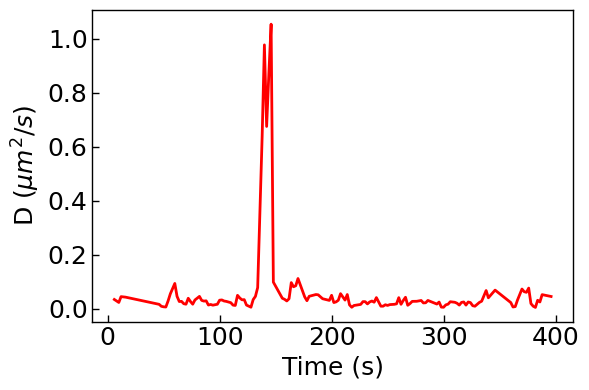

In [21]:
# Remove rows where D is NaN
track_data = track_data.dropna(subset=['D' , 'R2'])
track_data = track_data[(track_data['R2'] > 0.6)]
# Extract values for D and t
D = track_data['D'].values
t_valid = track_data['t'].values  

# Plot alpha vs. time
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(t_valid, D, linestyle='-', color='red', lw=2)  # Continuous red line

# Customize plot aesthetics
ax.spines[:].set_linewidth(1)
ax.tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1
)
ax.set_xlabel('Time (s)', fontsize=18)
ax.set_ylabel('D ($\mu m^2/s$)', fontsize=18)

# Final layout adjustments and show plot
plt.tight_layout()
plt.show()